<div style="text-align: center;">
    <h1>
        <a href="https://www.kaggle.com/datasets/mchirico/montcoalert" target="_blank">Emergency - 911 Calls</a>
    </h1>
    <h3>Mohammad Nourbakhsh Marvast</h3>
</div>


# Loading data

In [1]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
from pandas.api.types import CategoricalDtype

sns.set_style('dark')

In [2]:
! unzip archive.zip

Archive:  archive.zip
replace 911.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: 911.csv                 


In [3]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


# Data Structure & Overview

## What is the shape of the DataFrame?

In [5]:
df.shape

(663522, 9)

## What are the data types of each column?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


## Check and fix data types:

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [9]:
type(df['timeStamp'].iloc[0])

str

In [10]:
df.loc[:, 'timeStamp'] = pd.to_datetime(df['timeStamp'], format='%Y-%m-%d %H:%M:%S')

In [11]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:10:52')

In [12]:
df.dtypes.to_frame(name='dtype')

,dtype
lat,float64
lng,float64
desc,object
zip,float64
title,object
timeStamp,object
twp,object
addr,object
e,int64


In [13]:
df.iloc[0].apply(lambda x: type(x)).to_frame(name='dtype')

,dtype
lat,<class 'numpy.float64'>
lng,<class 'numpy.float64'>
desc,<class 'str'>
zip,<class 'numpy.float64'>
title,<class 'str'>
timeStamp,<class 'pandas._libs.tslibs.timestamps.Timesta...
twp,<class 'str'>
addr,<class 'str'>
e,<class 'numpy.int64'>


## How many missing values are there in each column?

In [14]:
df.isna().sum()

,0
lat,0
lng,0
desc,0
zip,80199
title,0
timeStamp,0
twp,293
addr,0
e,0


## How many unique values does each categorical column have?

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns # Ops! we don't want timeStamp to be categorical!

Index(['desc', 'title', 'timeStamp', 'twp', 'addr'], dtype='object')

In [16]:
categorical_columns = df.iloc[0].apply(lambda x: np.nan if type(x) != str else str).dropna().index
categorical_columns

Index(['desc', 'title', 'twp', 'addr'], dtype='object')

In [17]:
df.loc[:, categorical_columns].nunique()

,0
desc,663282
title,148
twp,68
addr,41292


# Call Type Analysis

## What are the top 10 most frequent call reasons?

In [18]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [19]:
df['title'].nunique()

148

In [20]:
df['title'].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [21]:
df['911 reason'] = df['title'].apply(lambda x: x.strip().split(':')[0])

In [22]:
df['911 reason'].unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [23]:
df.groupby(['911 reason', 'title']).size()

911 reason  title                               
EMS         EMS: ABDOMINAL PAINS                      9005
            EMS: ACTIVE SHOOTER                          3
            EMS: ALLERGIC REACTION                    2878
            EMS: ALTERED MENTAL STATUS               10088
            EMS: AMPUTATION                             99
                                                     ...  
Traffic     Traffic: HAZARDOUS ROAD CONDITIONS -      6833
            Traffic: ROAD OBSTRUCTION -              23235
            Traffic: VEHICLE ACCIDENT -             148372
            Traffic: VEHICLE FIRE -                   3366
            Traffic: VEHICLE LEAKING FUEL -            292
Length: 148, dtype: int64

In [24]:
df.groupby('911 reason').size().to_frame('num of calls').sort_values(by='num of calls',ascending=False)

,num of calls
911 reason,
EMS,332692
Traffic,230208
Fire,100622


In [25]:
df['911 reason'].value_counts()

,count
911 reason,
EMS,332692
Traffic,230208
Fire,100622


In [26]:
df.groupby('title').size().to_frame('num of calls').sort_values(by='num of calls',ascending=False).head(10)

,num of calls
title,
Traffic: VEHICLE ACCIDENT -,148372
Traffic: DISABLED VEHICLE -,47909
Fire: FIRE ALARM,38336
EMS: FALL VICTIM,34676
EMS: RESPIRATORY EMERGENCY,34248
EMS: CARDIAC EMERGENCY,32332
EMS: VEHICLE ACCIDENT,25513
Traffic: ROAD OBSTRUCTION -,23235
EMS: SUBJECT IN PAIN,19646


In [27]:
df['title'].value_counts().head(10)

,count
title,
Traffic: VEHICLE ACCIDENT -,148372
Traffic: DISABLED VEHICLE -,47909
Fire: FIRE ALARM,38336
EMS: FALL VICTIM,34676
EMS: RESPIRATORY EMERGENCY,34248
EMS: CARDIAC EMERGENCY,32332
EMS: VEHICLE ACCIDENT,25513
Traffic: ROAD OBSTRUCTION -,23235
EMS: SUBJECT IN PAIN,19646


## What proportion of calls does each reason represent?

In [28]:
df['911 reason'].value_counts(normalize=True)

,proportion
911 reason,
EMS,0.501403
Traffic,0.346949
Fire,0.151648


In [29]:
df['title'].value_counts(normalize=True).head()

,proportion
title,
Traffic: VEHICLE ACCIDENT -,0.223613
Traffic: DISABLED VEHICLE -,0.072204
Fire: FIRE ALARM,0.057777
EMS: FALL VICTIM,0.052261
EMS: RESPIRATORY EMERGENCY,0.051615


<Axes: xlabel='911 reason'>

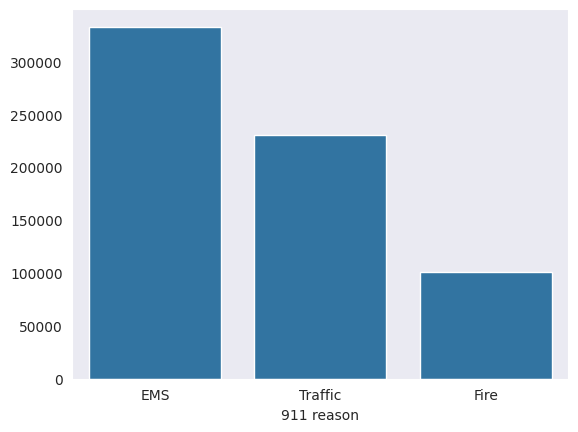

In [30]:
sns.barplot(x=df['911 reason'].value_counts().index,
            y=df['911 reason'].value_counts().values)

<Axes: xlabel='911 reason', ylabel='count'>

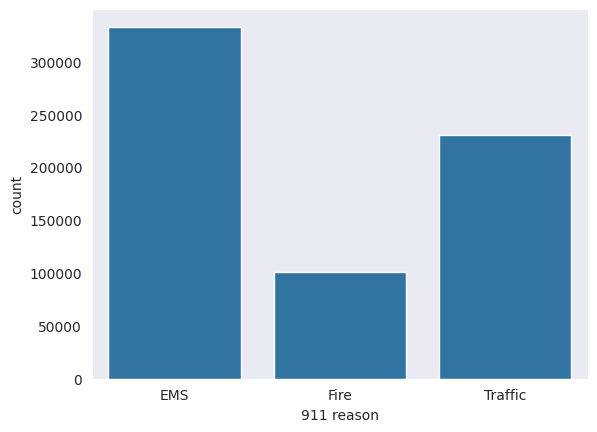

In [31]:
sns.countplot(x='911 reason', data= df)

## How does the distribution of call reasons vary by township?

In [32]:
df[[ 'twp', '911 reason']].value_counts() # It's too complicated!

twp            911 reason
NORRISTOWN     EMS           24774
LOWER MERION   Traffic       23758
               EMS           21578
ABINGTON       EMS           20617
POTTSTOWN      EMS           17425
                             ...  
PHILA COUNTY   EMS              41
BERKS COUNTY   Fire             10
LEHIGH COUNTY  Fire              9
               Traffic           9
PHILA COUNTY   Fire              7
Name: count, Length: 204, dtype: int64

In [33]:
df['twp'].value_counts().head(5) # Let's look at the towns with the most calls

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


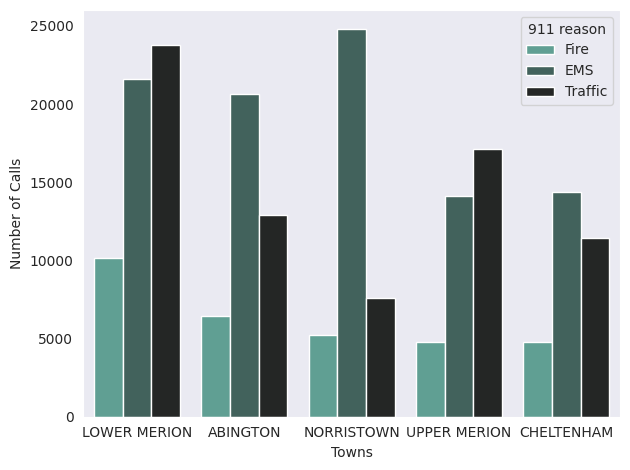

In [34]:
# Get the top 5 towns by count
top_towns = df['twp'].value_counts().head(5).index

# Filter the original DataFrame to include only the top 5 towns
filtered_df = df[df['twp'].isin(top_towns)]

# Create the count plot with specified order
sns.countplot(x='twp', data=filtered_df, order=top_towns, hue= '911 reason', palette='dark:#5A9_r')
plt.xlabel('Towns')
plt.ylabel('Number of Calls')

plt.tight_layout()
plt.show()

## Which reason of call has the highest average number of calls per month?

In [35]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,911 reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [36]:
df2= df.groupby([pd.Grouper(key='timeStamp', freq='MS'), '911 reason']).size().reset_index(name='num of calls').copy()

/usr/local/lib/python3.11/dist-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


In [37]:
df2.head()

,timeStamp,911 reason,num of calls
0,2015-12-01,EMS,3898
1,2015-12-01,Fire,1095
2,2015-12-01,Traffic,2923
3,2016-01-01,EMS,6063
4,2016-01-01,Fire,1904


In [38]:
df2.loc[:,'timeStamp']= df2['timeStamp'].apply(lambda x: x.month)

<ipython-input-38-1b9cbe5f77c7>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12 12 12  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12  1  1  1  2  2  2  3  3  3
  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11
 12 12 12  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7
  8  8  8  9  9  9 10 10 10 11 11 11 12 12 12  1  1  1  2  2  2  3  3  3
  4  4  4  5  5  5  6  6  6  7  7  7  8  8  8  9  9  9 10 10 10 11 11 11
 12 12 12  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df2.loc[:,'timeStamp']= df2['timeStamp'].apply(lambda x: x.month)


In [39]:
df2.head()

,timeStamp,911 reason,num of calls
0,12,EMS,3898
1,12,Fire,1095
2,12,Traffic,2923
3,1,EMS,6063
4,1,Fire,1904


In [40]:
df2.groupby(['timeStamp','911 reason']).mean()

num of calls
timeStamp 911 reason              
1         EMS              6194.00
          Fire             1817.40
          Traffic          4455.80
2         EMS              5665.80
          Fire             1618.40
          Traffic          3801.20
3         EMS              5997.80
          Fire             1827.00
          Traffic          4180.60
4         EMS              5697.00
          Fire             1626.40
          Traffic          3410.80
5         EMS              5894.60
          Fire             1738.20
          Traffic          3869.00
6         EMS              5902.40
          Fire             1975.80
          Traffic          4128.60
7         EMS              6005.40
          Fire             1933.00
          Traffic          4028.00
8         EMS              6102.50
          Fire             1899.50
          Traffic          4087.75
9         EMS              5995.50
          Fire             1814.50
          Traffic          3993.25
10        EMS              6256.25
          Fire             1920.75
          Traffic          4633.00
11        EMS              5928.75
          Fire             1837.50
          Traffic          4779.25
12        EMS              5755.00
          Fire             1610.40
          Traffic          4173.00

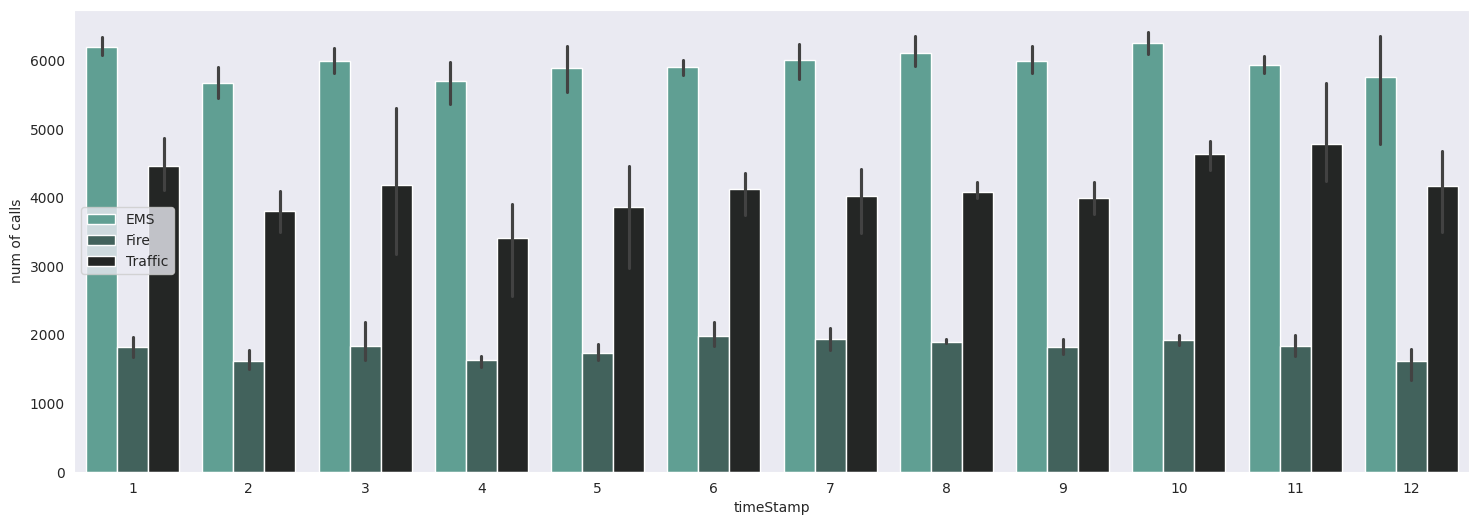

In [41]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='timeStamp', y='num of calls', data=df2, hue='911 reason', palette='dark:#5A9_r')
plt.legend(loc=0)
plt.show()

# Temporal Trends

## How many calls occur per year?

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,911 reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [43]:
df_temp= df.groupby(pd.Grouper(key='timeStamp', freq='YE')).size().to_frame('num of calls').reset_index()

/usr/local/lib/python3.11/dist-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


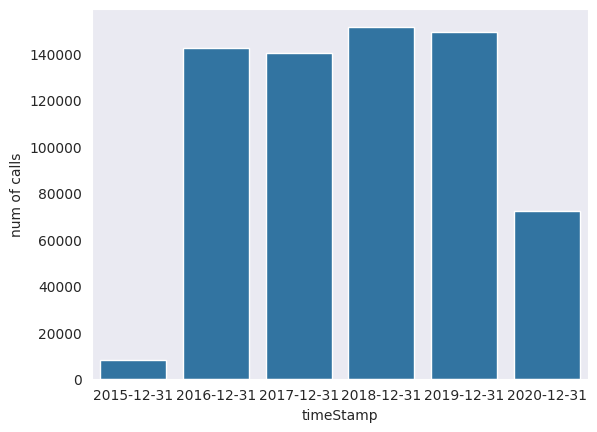

In [44]:
sns.barplot(x='timeStamp', y='num of calls', data=df_temp, order=df_temp['timeStamp'])
plt.show()

## How many calls per month (across all years)?

In [45]:
df_temp= df.groupby(pd.Grouper(key='timeStamp', freq='ME')).size().to_frame('num of calls').reset_index()

/usr/local/lib/python3.11/dist-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


In [46]:
df_temp.head()

,timeStamp,num of calls
0,2015-12-31,7916
1,2016-01-31,13096
2,2016-02-29,11396
3,2016-03-31,11059
4,2016-04-30,11287


In [47]:
df_temp.loc[:,'timeStamp']= df_temp['timeStamp'].apply(lambda x: x.month)

<ipython-input-47-5fbb6b94f320>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[12  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11
 12  1  2  3  4  5  6  7  8  9 10 11 12  1  2  3  4  5  6  7  8  9 10 11
 12  1  2  3  4  5  6  7]' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df_temp.loc[:,'timeStamp']= df_temp['timeStamp'].apply(lambda x: x.month)


In [48]:
df_temp.groupby('timeStamp').sum()

,num of calls
timeStamp,
1,62336
2,55427
3,60027
4,53671
5,57509
6,60034
7,59832
8,48359
9,47213


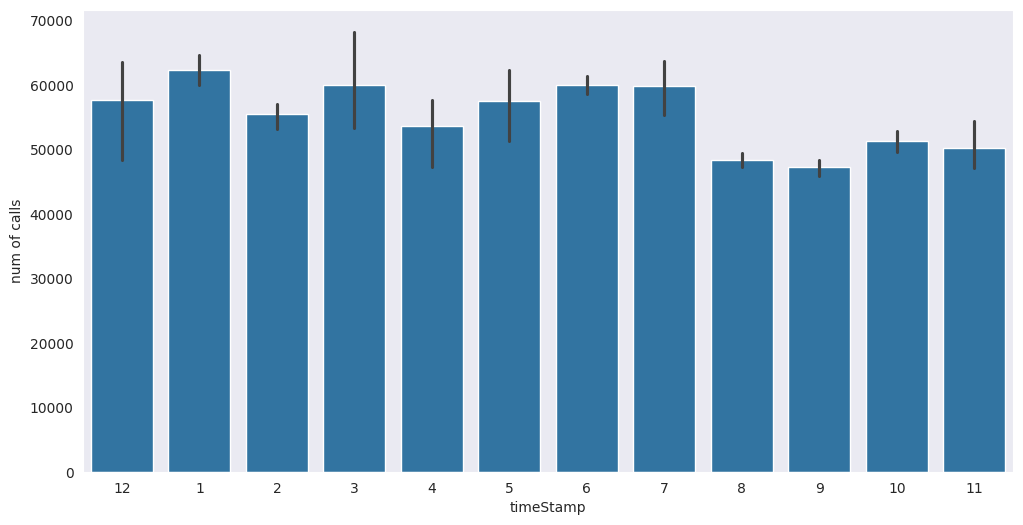

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='timeStamp', y='num of calls', data=df_temp, order=df_temp['timeStamp'], estimator= np.sum)
plt.show()

## Which day of the week sees the most 911 calls?

In [50]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,911 reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [51]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [52]:
df['day_of_week'] = df['timeStamp'].dt.day_name()

In [53]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,911 reason,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday


In [54]:
df['day_of_week'].value_counts()

,count
day_of_week,
Friday,102942
Wednesday,99157
Thursday,98683
Tuesday,97684
Monday,96745
Saturday,89452
Sunday,78859


In [55]:
df_temp = (
    df
    .assign(
        year=df['timeStamp'].dt.year,
        day_of_week=df['timeStamp'].dt.day_name()
    )
    .groupby(['year', 'day_of_week'])
    .size()
    .to_frame('count')
    .sort_values(['year', 'count'], ascending=[False, False])
    .rename_axis(index=['year', 'day_of_week'])
)


In [56]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [57]:
df_temp

count
year day_of_week       
2020 Wednesday    11069
     Friday       11060
     Thursday     10770
     Monday       10518
     Tuesday      10122
     Saturday      9959
     Sunday        8760
2019 Friday       22907
     Thursday     22403
     Wednesday    22258
     Tuesday      22164
     Monday       21988
     Saturday     19759
     Sunday       17639
2018 Friday       24505
     Thursday     22726
     Wednesday    22388
     Monday       22147
     Tuesday      21654
     Saturday     20437
     Sunday       17670
2017 Friday       21421
     Tuesday      21303
     Wednesday    21055
     Thursday     20598
     Monday       20299
     Saturday     18849
     Sunday       16818
2016 Friday       21991
     Tuesday      21207
     Wednesday    21140
     Thursday     20924
     Monday       20542
     Saturday     19488
     Sunday       17068
2015 Thursday      1262
     Monday        1251
     Wednesday     1247
     Tuesday       1234
     Friday        1058
     Saturday       960
     Sunday         904

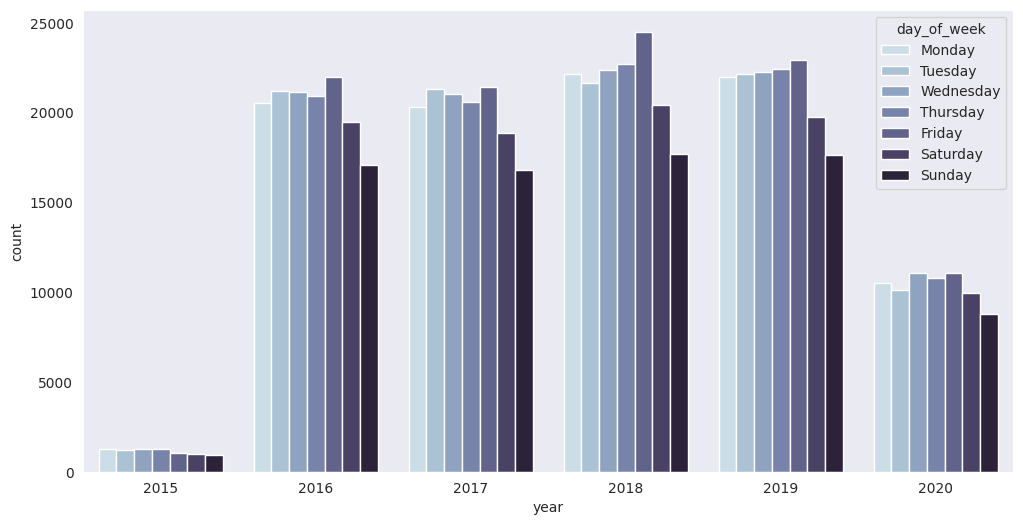

In [58]:
fig,ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='year', y='count', data= df_temp, hue= 'day_of_week', hue_order= days_order, palette= 'ch:s=.25,rot=-.25')
plt.show()

In [59]:
df_temp.reset_index('day_of_week').groupby(level= [0]).first()

,day_of_week,count
year,,
2015,Thursday,1262
2016,Friday,21991
2017,Friday,21421
2018,Friday,24505
2019,Friday,22907
2020,Wednesday,11069


## What is the hourly distribution of calls in a typical day?

In [60]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,911 reason,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday


In [61]:
date_ =pd.to_datetime(df['timeStamp'].sample().values[0])
date_

Timestamp('2018-05-24 17:31:23')

In [62]:
def hourly_distribution(date, plot_= True, figsize=(10, 5)):

    df_temp = df[df['timeStamp'].dt.date == date.date()]

    hourly_dist = (
        df_temp
        .groupby(pd.Grouper(key='timeStamp', freq='h'))
        .size()
        .to_frame('num of calls')
        .assign(
            hour=lambda x: x.index.hour
            )
        .set_index('hour')
        .sort_index()
        )

    if plot_:
        fig, ax = plt.subplots(figsize= figsize)
        sns.barplot(x= 'hour', y= 'num of calls', data= hourly_dist)

        ax.set_title(f'Hourly Distribution of Calls on {date.date()}')
        plt.tight_layout()
        plt.show()

    return hourly_dist



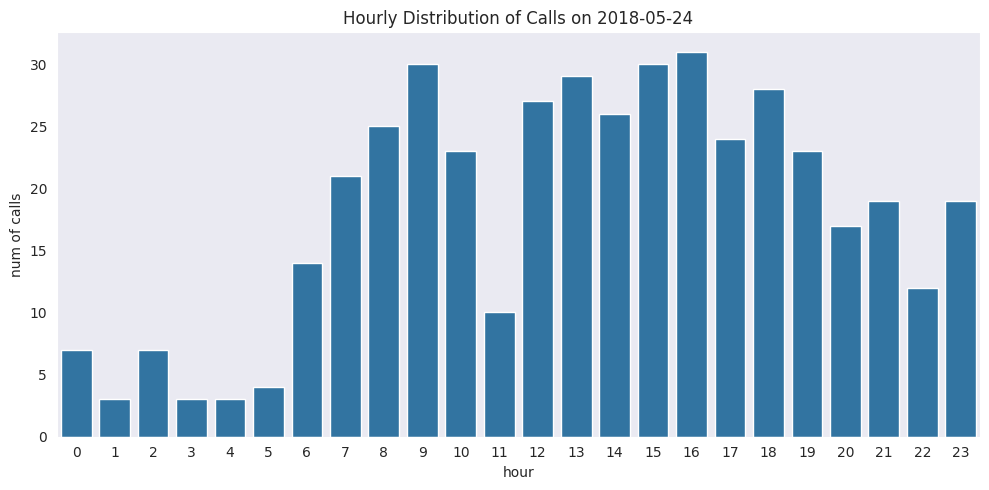

In [63]:
dist_= hourly_distribution(date_)

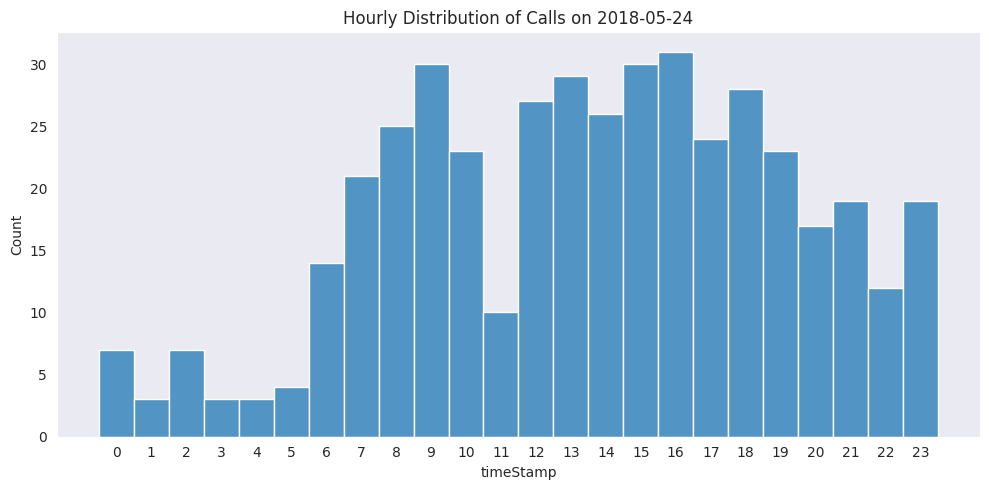

In [64]:
df_temp = df[df['timeStamp'].dt.date == date_.date()]



fig, ax = plt.subplots(figsize= (10, 5))
sns.histplot(x= df_temp['timeStamp'].dt.hour, data= dist_, bins= 24, ax= ax, discrete=True)
ax.set_xticks(range(24))

ax.set_title(f'Hourly Distribution of Calls on {date_.date()}')
plt.tight_layout()
plt.show()


## Is there a seasonal trend (e.g., more calls in summer vs. winter)?

In [65]:
df_temp = (
    df
    .assign(
        year=df['timeStamp'].dt.year,
        quarter=df['timeStamp'].dt.quarter
    )
)

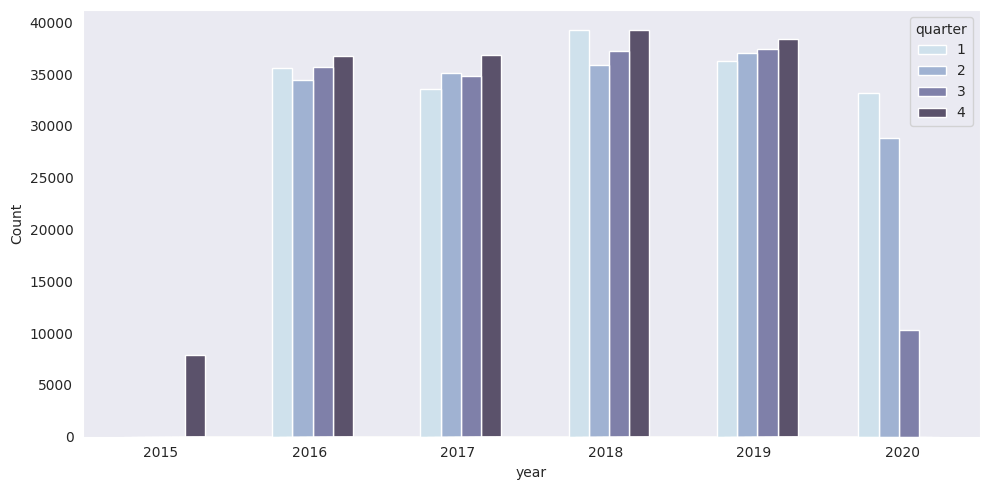

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='year', data= df_temp, hue= 'quarter', palette= 'ch:s=.25,rot=-.25', multiple='dodge', shrink=12, ax= ax)

plt.tight_layout()
plt.show()

# Spatial Analysis

## Which township has the highest total number of calls?

In [67]:
df.value_counts('twp').head(5)

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


In [68]:
df_temp = (
    df
    .groupby([df['timeStamp'].dt.year.rename('year'), 'twp'])
    .size()
    .to_frame('num of calls')
    .reset_index()
    .sort_values(['year', 'num of calls'], ascending= [False, False], ignore_index= True)
    )

In [69]:
df_plt= df_temp.groupby('year').head(3)

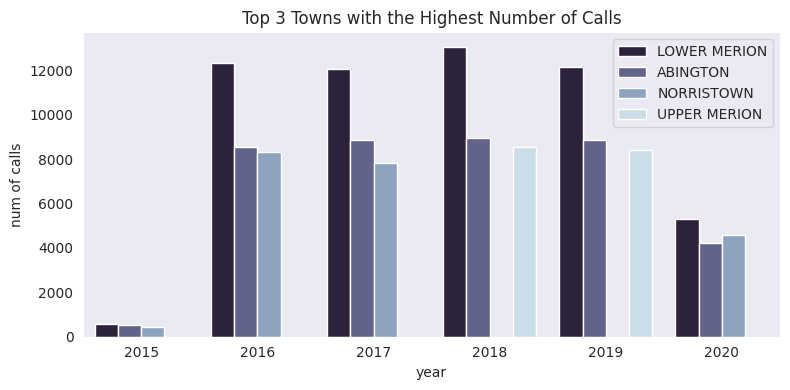

In [70]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.barplot(x='year', y='num of calls', data= df_plt, hue= 'twp', palette= 'ch:s=.25,rot=-.25_r')

ax.set_title('Top 3 Towns with the Highest Number of Calls')
plt.legend(loc=0)
plt.tight_layout()
plt.show()

## Which ZIP code sees the most emergency calls?

In [71]:
df_temp = (
    df.
    groupby('zip')
    .size()
    .to_frame('num of calls')
    .reset_index()
    .sort_values('num of calls', ascending= False, ignore_index= True)
    )

In [72]:
df_temp.head()

,zip,num of calls
0,19401.0,45606
1,19464.0,43910
2,19403.0,34888
3,19446.0,32270
4,19406.0,22464


## Plot call locations on a scatter plot (latitude vs. longitude).

In [73]:
import geopandas as gpd

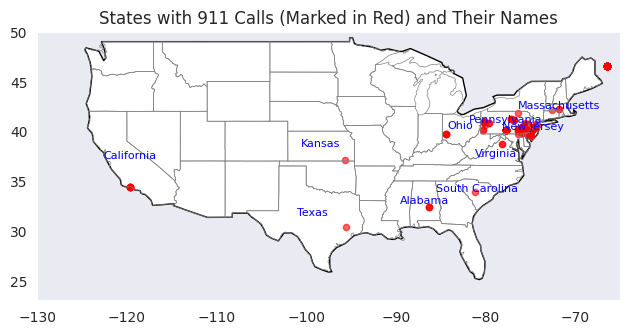

In [74]:
# This URL points to a U.S. GeoJSON of state boundaries
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/USA.geo.json"
usa = gpd.read_file(url)

# Load U.S. states boundaries (GeoJSON)
url_states = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"
states = gpd.read_file(url_states)

gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.lng, df.lat),
    crs="EPSG:4326"
)

# Merge points with state polygons (already done)
gdf_with_states = gpd.sjoin(gdf, states, how='left', predicate='within')

# Get only the states with points
states_with_points = states[states['name'].isin(gdf_with_states['name'].dropna())]



# Plotting
fig, ax = plt.subplots()

# Plot state boundaries
states.boundary.plot(ax=ax, edgecolor='gray', linewidth=0.5)
# Plot US outline
usa.plot(ax=ax, color='white', edgecolor='black')
# Plot points
gdf.plot(ax=ax, markersize=20, color='red', alpha=0.6)

# Add state name labels for states that have points
for _, row in states_with_points.iterrows():
    if row['geometry'].geom_type == 'Polygon':
        x, y = row['geometry'].centroid.coords[0]
    else:  # MultiPolygon
        x, y = row['geometry'].centroid.coords[0]
    ax.text(x, y, row['name'], fontsize=8, ha='center', color='blue')

ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)
ax.set_title("States with 911 Calls (Marked in Red) and Their Names")
plt.tight_layout()
plt.show()

## Create a heatmap of calls by weekday vs. hour.

In [75]:
df_temp= df.pivot_table(index= df['timeStamp'].dt.day_name().rename('weekday'), columns= df['timeStamp'].dt.hour.rename('hour'),values= 'timeStamp', aggfunc= 'count')

In [76]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_temp = df_temp.reindex(weekday_order)

df_temp

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,1894,1571,1368,1272,1336,1844,2675,4430,5504,5724,...,5713,6289,6346,6408,5441,4488,3823,3254,2658,2072
Tuesday,1720,1459,1322,1213,1247,1741,2784,4425,5634,5566,...,5926,6252,6495,6883,5628,4621,3845,3409,2708,2137
Wednesday,1664,1484,1259,1265,1128,1609,2668,4644,5469,5444,...,6069,6533,6745,7062,5691,4686,4116,3537,2826,2207
Thursday,1731,1408,1426,1236,1293,1775,2816,4432,5297,5412,...,6079,6493,6375,6935,5512,4703,4045,3490,2844,2354
Friday,1983,1635,1449,1296,1339,1639,2670,4143,5018,5288,...,6394,7040,7065,7113,5668,5056,4375,3913,3422,2834
Saturday,2447,2059,1883,1592,1451,1580,1880,2489,3457,4315,...,5421,5181,5211,5213,4980,4753,4127,3895,3226,2965
Sunday,2424,2135,1946,1614,1471,1488,1726,2408,3001,3728,...,4744,4475,4560,4505,4402,4135,3748,3161,2629,2323


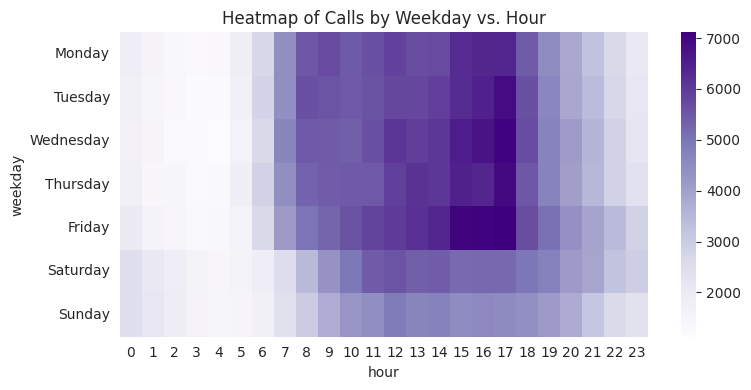

In [77]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(df_temp, cmap= 'Purples', ax= ax)

ax.set_title('Heatmap of Calls by Weekday vs. Hour')
plt.tight_layout()
plt.show()

# Detailed Frequency & Distribution

## What are the top 10 addresses where calls originate most frequently?

In [78]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,911 reason,day_of_week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday


In [79]:
df['addr'].nunique()

41292

In [80]:
df.value_counts('addr').head(10)

,count
addr,
SHANNONDELL DR & SHANNONDELL BLVD,7285
MAIN ST & OLD SUMNEYTOWN PIKE,2576
THE FAIRWAY & RYDAL RD,1986
EAGLEVILLE RD & SUNDERLAND DR,1618
EVERGREEN RD & W LIGHTCAP RD,1591
GERMANTOWN PIKE & HANNAH AVE,1557
GULPH RD & KIRK AVE,1440
BLACK ROCK RD & S TRAPPE RD,1425
DAVISVILLE RD & PENNYPACK RD,1367


## What is the distribution of call counts per township?

In [81]:
df_temp= df.value_counts('twp', normalize= True).rename('% of calls')

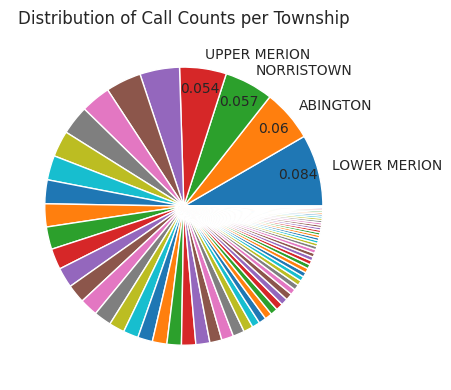

In [82]:
fig, ax = plt.subplots(figsize=(8, 4))

# Assume df_temp is a Series
labels = [name if df_temp.iloc[i] > 0.05 else '' for i, name in enumerate(df_temp.index)]

# Custom function: only show value if label exists
def custom_autopct(pct, allvals=df_temp.values):
    index = custom_autopct.counter
    custom_autopct.counter += 1
    return f'{round(allvals[index], 3)}' if labels[index] else ''

custom_autopct.counter = 0  # initialize counter

# Plot pie chart
plt.pie(
    df_temp,
    labels=labels,
    autopct=custom_autopct,
    pctdistance=0.85

)

ax.set_title('Distribution of Call Counts per Township')
plt.tight_layout()
plt.show()

## Calculate the mean and median number of calls per day.

In [83]:
df_temp= df.groupby(df['timeStamp'].dt.date).size()

In [84]:
print(f'mean: {df_temp.mean()}, median: {df_temp.median()}')

mean: 391.68949232585595, median: 389.0
